
# Predicting Air Pollution Levels using Linear Models 

This file demonstrates the steps to use simple OLS, Ridge and a Lasso Regression models to predict air pollution levels, and determines the best model based on RMSE and R-squared. 

In [2]:
# Import the libraries 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.impute import KNNImputer
from sklearn.metrics import r2_score




# Loading the Data 

In [3]:
full_data = pd.read_csv("prepped_data/Full_data.csv") 
full_data.columns

Index(['Hour', 'date', 'NO_ugm3', 'NO2_ugm3', 'O3_ugm3', 'CO_mgm3', 'CO2_mgm3',
       'PM25_ugm3', 'SiteID', 'Lat', 'Long', 'day_of_week', 'avgtempC',
       'maxtempC', 'mintempC', 'sunHour', 'uvIndex', 'humidity',
       'winddirDegree', 'windspeedKmph', 'cloudcover', 'precipMM', 'pressure',
       'DCC-AQ1-co', 'DCC-AQ1-no', 'DCC-AQ10-no', 'DCC-AQ13-no', 'DCC-AQ5-no',
       'DCC-AQ6-no', 'DCC-AQ1-no2', 'DCC-AQ10-no2', 'DCC-AQ13-no2',
       'DCC-AQ22-no2', 'DCC-AQ5-no2', 'DCC-AQ6-no2', 'DCC-AQ69-no2',
       'DCC-AQ22-o3', 'DCC-AQ69-o3', 'DCC-AQ10-pm1', 'DCC-AQ13-pm1',
       'DCC-AQ2-pm1', 'DCC-AQ3-pm1', 'DCC-AQ4-pm1', 'DCC-AQ5-pm1',
       'DCC-AQ52-pm1', 'DCC-AQ6-pm1', 'TNO2161-pm1', 'TNO2162-pm1',
       'TNO4435-pm1', 'TNT1088-pm1', 'DCC-AQ10-pm10', 'DCC-AQ13-pm10',
       'DCC-AQ2-pm10', 'DCC-AQ22-pm10', 'DCC-AQ3-pm10', 'DCC-AQ4-pm10',
       'DCC-AQ5-pm10', 'DCC-AQ52-pm10', 'DCC-AQ6-pm10', 'TNO2161-pm10',
       'TNO2162-pm10', 'TNO4435-pm10', 'TNT1088-pm10', 'DCC-AQ10-pm2_

In [4]:
df_test = full_data[full_data['date'] >= '2022-05-01']
df_train = full_data[full_data['date'] < '2022-05-01']

In [30]:
# #Split train into X and Y
Xtrain = df_train.iloc[:, 8:].values
ytrain = df_train["PM25_ugm3"].values

# #Split test into X and Y
Xtest = df_test.iloc[:, 8:].values
ytest = df_test["PM25_ugm3"].values



# Hot One Encoding

When conducting a linear, a ridge or a lasso regression, it is important to do one-hot encoding because these regularization techniques require numerical input data.

In [5]:
# # Assuming you know the names of the categorical columns
# categorical_columns = ['SiteID', 'day_of_week']  # List of categorical column names

# # Convert arrays back to DataFrame for easier manipulation
# Xtrain_df = pd.DataFrame(Xtrain, columns=df_train.columns[8:])
# Xtest_df = pd.DataFrame(Xtest, columns=df_test.columns[8:])

# # Initialize the OneHotEncoder
# encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# # Fit the encoder on the training data
# encoder.fit(Xtrain_df[categorical_columns])

# # Transform both training and test data
# Xtrain_encoded = encoder.transform(Xtrain_df[categorical_columns])
# Xtest_encoded = encoder.transform(Xtest_df[categorical_columns])

# # Create DataFrames from the encoded arrays, include column names for easier merging
# encoded_columns = encoder.get_feature_names_out(categorical_columns)
# Xtrain_encoded_df = pd.DataFrame(Xtrain_encoded, columns=encoded_columns)
# Xtest_encoded_df = pd.DataFrame(Xtest_encoded, columns=encoded_columns)

# # Drop the original categorical columns and concat the new encoded columns
# Xtrain_final = pd.concat([Xtrain_df.drop(categorical_columns, axis=1), Xtrain_encoded_df], axis=1)
# Xtest_final = pd.concat([Xtest_df.drop(categorical_columns, axis=1), Xtest_encoded_df], axis=1)


# Mean Imputation 

In [6]:
# np.random.seed(0)   
# # imputing 
# imputer = SimpleImputer(strategy="mean")
# Xtrain_1 = imputer.fit_transform(Xtrain_final)  # Impute
# Xtest_1 = imputer.transform(Xtest_final)  # Impute

# # Convert back to DataFrame
# Xtrain_1 = pd.DataFrame(Xtrain_1, columns=Xtrain_final.columns)
# Xtest_1 = pd.DataFrame(Xtest_1, columns=Xtest_final.columns)

# # scaling 
# scaler = StandardScaler()
# Xtrain_1 = scaler.fit_transform(Xtrain_1)  # Scale
# Xtest_1 = scaler.transform(Xtest_1)  # Scale

# # Convert back to DataFrame
# Xtrain_1 = pd.DataFrame(Xtrain_1, columns=Xtrain_final.columns)
# Xtest_1 = pd.DataFrame(Xtest_1, columns=Xtest_final.columns)

# KNN Imputation

This final py file only retains the analysis conducted with KNN imputation, as it yields slightly better results

In [7]:
# np.random.seed(0)   

# imputer = KNNImputer(n_neighbors=5)
# Xtrain_KNN = imputer.fit_transform(Xtrain_final)
# Xtest_KNN = imputer.transform(Xtest_final)

# # Convert back to DataFrame
# Xtrain_2 = pd.DataFrame(Xtrain_KNN, columns=Xtrain_final.columns)
# Xtest_2 = pd.DataFrame(Xtest_KNN, columns=Xtest_final.columns)

# Xtrain = scaler.fit_transform(Xtrain_2)
# Xtest = scaler.transform(Xtest_2)

# # Convert back to DataFrame
# Xtrain_KNN = pd.DataFrame(Xtrain, columns=Xtrain_final.columns)
# Xtest_KNN = pd.DataFrame(Xtest, columns=Xtest_final.columns)



Read the train and test csvs to be used in the analyses. 

In [6]:
Xtrain_KNN_encoded = pd.read_csv("prepped_data/Xtrain_KNN_encoded.csv")
Xtest_KNN_encoded = pd.read_csv("prepped_data/Xtest_KNN_encoded.csv")   

In [7]:
print(Xtrain.shape)
print(Xtrain_KNN_encoded.shape)

print(Xtest.shape)
print(Xtest_KNN_encoded.shape)

(34923, 84)
(34923, 901)
(8272, 84)
(8272, 901)


# Linear Regression

The following linear regression will be used as a benchmark for our analyses. The underlining question that we seek to answer is " Does our model perform better than a simple linear regression?".

In [9]:
linear_model = LinearRegression()

# You can still use TimeSeriesSplit for cross-validation to evaluate model performance
tscv = TimeSeriesSplit(n_splits=5)

# Evaluate the model using cross-validation
scores = cross_val_score(linear_model,
                        Xtrain_KNN_encoded,
                        ytrain, 
                        cv=tscv,
                        scoring='neg_mean_squared_error')

# Print the average of the scores (neg_mean_squared_error)
print("Average MSE:", np.mean(-scores))

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(Xtrain_KNN_encoded, ytrain)

# Predict on the test data
y_pred_linear = linear_model.predict(Xtest_KNN_encoded)

test_rmse_linear = np.sqrt(mean_squared_error(ytest, y_pred_linear))
print(f"Test RMSE - Linear: {test_rmse_linear}")

# Calculate R-squared score
r2_linear = r2_score(ytest, y_pred_linear)
print("R-squared - Linear:",-r2_linear)



Average MSE: 9.31181087046276e+24
Test RMSE - Linear: 5.9779093382713375
R-squared - Linear: 0.19014792007349413


### Plotting Actual vs Predicted Results 

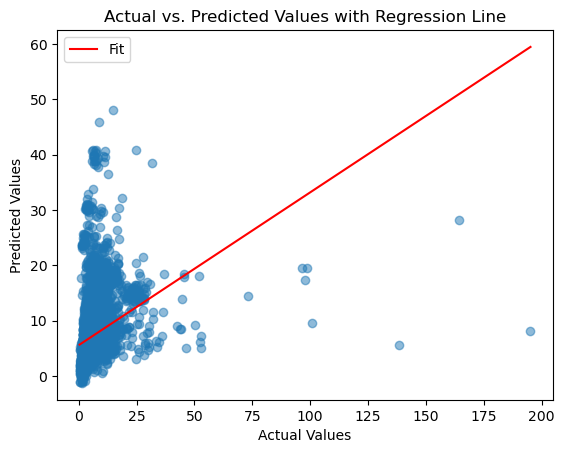

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming ytest and y_pred_linear are defined
# Plot the data points
plt.scatter(ytest, y_pred_linear, alpha=0.5)

# Calculate the line of best fit
slope, intercept = np.polyfit(ytest, y_pred_linear, 1)
line = slope * ytest + intercept

# Sort values for plotting (optional but often makes the plot cleaner)
sorted_indices = np.argsort(ytest)
sorted_ytest = ytest[sorted_indices]
sorted_line = line[sorted_indices]

# Plot the regression line
plt.plot(sorted_ytest, sorted_line, 'r', label='Fit')

# Add labels and title (optional)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values with Regression Line')
plt.legend()

# Show the plot
plt.show()


The plot of actual vs predicted values shows that the data does not fit a regression, which is also explained by the low R-rquared of 0.19. The presence of outliers might be better accounted for by Ridge and Lasso regressions. 

### Features Importance

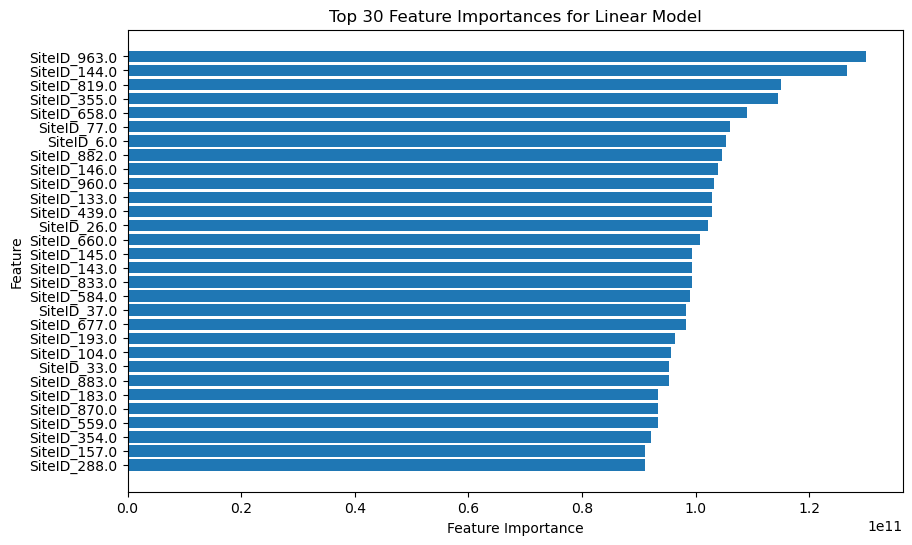

In [11]:
# Get feature importances from the trained model
feature_importances = linear_model.coef_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N features and their importances
top_n = 30  # Adjust this value based on your preference
top_features = Xtrain_KNN_encoded.columns[sorted_indices][:top_n]
top_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_importances, align='center')
plt.yticks(range(top_n), top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances for Linear Model'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature at the top
plt.show()

# Linear regression with the log of the target variable

Our model might not being performing well on outliers. Logging ypred and reverting the log might imporve the analysis. 


In [21]:
# ytest_log = np.log1p(ytest)

ytrain_log = np.log1p(ytrain)

linear_model.fit(Xtrain_KNN_encoded, ytrain_log)

# Predict using the test set
y_pred_log_linear = linear_model.predict(Xtest_KNN_encoded)

# Exponentiate the predictions to revert back to the original scale
y_pred_linear = np.expm1(y_pred_log_linear)

In [35]:

# Evaluate the model
test_rmse_linear_log = np.sqrt(mean_squared_error(ytest, y_pred_linear))
print(f"Test RMSE - Linear: {test_rmse_linear_log}")

#Calculate R-squared score
r2_linear_log = r2_score(ytest, y_pred_linear)
print("R-squared - Linear:", -r2_linear_log)

Test RMSE - Linear: 7.635292639101635
R-squared - Linear: 0.9415727478655314


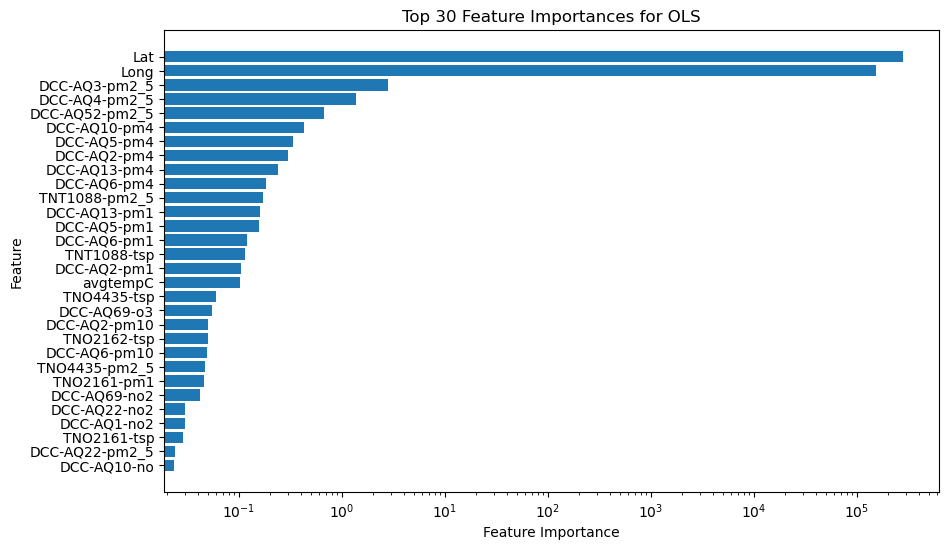

<Figure size 640x480 with 0 Axes>

In [72]:
# Get feature importances from the trained model
feature_importances = linear_model.coef_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N features and their importances
top_n = 30  # Adjust this value based on your preference
top_features = Xtrain_KNN_encoded.columns[sorted_indices][:top_n]
top_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_importances, align='center')
plt.yticks(range(top_n), top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances for OLS'.format(top_n))
plt.gca().invert_yaxis()  # display most important features at the top 
#plt.show()

# Set x-axis to log scale to better visualize small features
plt.xscale('log')

# Handle any negative or zero values (assuming you have only positive values; if not, adjust here)
plt.xlim(left=np.min(top_importances[top_importances > 0]) * 0.8)  # set lower limit slightly lower than the smallest positive value

plt.show()
plt.savefig('model5a.png', format = 'png')  # Adjust path and format as needed

In [68]:
# Assuming linear_model is your linear regression model
coefficients = linear_model.coef_
sorted_indices = np.argsort(coefficients)[::-1]  # Sort indices in descending order

# Print coefficients in descending order
for index in sorted_indices:
    print(f'Coefficient {index}: {coefficients[index]}')

Coefficient 0: 278034.30169282854
Coefficient 1: 153605.6048063435
Coefficient 57: 2.8078853039432943
Coefficient 58: 1.375442819010459
Coefficient 60: 0.6685433611746703
Coefficient 66: 0.43403061973549484
Coefficient 71: 0.3377347840141738
Coefficient 68: 0.30258493637666106
Coefficient 67: 0.23910906604942284
Coefficient 73: 0.18501895844838145
Coefficient 65: 0.17105033293591987
Coefficient 29: 0.16167207445323584
Coefficient 33: 0.1578510279996408
Coefficient 35: 0.12036716606780828
Coefficient 80: 0.11511458249242423
Coefficient 30: 0.10499943616014207
Coefficient 2: 0.10391926727606915
Coefficient 79: 0.0600789821064609
Coefficient 27: 0.05480082479698467
Coefficient 42: 0.050891862455500814
Coefficient 78: 0.05060796676934842
Coefficient 48: 0.04877172279338993
Coefficient 64: 0.04744045118877693
Coefficient 36: 0.04571628841222264
Coefficient 25: 0.042337741044320865
Coefficient 22: 0.030413602838962106
Coefficient 19: 0.03001463060900278
Coefficient 77: 0.02900325027439976
Co

Such odd results, even after logging y, reveal that the lnear regression might not be suitable for our data. Calculating the training RMSE is a further way we can check how well the model fits the training data

## Training RMSE

In [37]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming the following objects are already defined:
# linear_model, Xtrain_KNN_encoded, ytrain

# Fit the model
linear_model.fit(Xtrain_KNN_encoded, np.log1p(ytrain))

# Predict on the training set
y_pred_log_train = linear_model.predict(Xtrain_KNN_encoded)

# Exponentiate the predictions to revert back to the original scale
y_pred_train = np.expm1(y_pred_log_train)

# Calculate RMSE for the training set
train_rmse_linear_log = np.sqrt(mean_squared_error(ytrain, y_pred_train))
print(f"Train RMSE - Linear: {train_rmse_linear_log}")
print(f"Test RMSE - Linear: {test_rmse_linear_log}")


Train RMSE - Linear: 7.093661564077363
Test RMSE - Linear: 7.635292639101635





# if values are close to each other we have a stable model, if theres a big gap there is overfitting. 
# if the test of the training set is lower compared to the test sets it means i am overfitting cause it performs well on the training 
# we want a model with not a big gap between test and train 


# with the time series cross validation yu have 5 splits, you can alo plot the MSE for every plot, then the squared average is the RMSE
# convert training mse into the original scale so that is comparable  
# Do it just 

# if you have 0 test error it means you are perfectly predicting the values, but for us is 5 which i s the actual scale, on average the deviation from the actual values is 5 
# the overall standard error of this column, the outcome value  

# Ridge 

### Train the model 

In [38]:
# Initialize the Linear Regression model
# # Initialize the Ridge
ridge = Ridge(alpha = 0.1,
              solver='sag', 
              max_iter=1000, 
              tol=0.001, 
              fit_intercept=True, 
              random_state=123)


# You can still use TimeSeriesSplit for cross-validation to evaluate model performance
tscv = TimeSeriesSplit(n_splits=5)

# Evaluate the model using cross-validation
scores = cross_val_score(ridge,
                        Xtrain_KNN_encoded,
                        ytrain, 
                        cv=tscv,
                        scoring='neg_mean_squared_error')

# Print the average of the scores (neg_mean_squared_error)
print("Average MSE:", np.mean(-scores))

# Fit the model on the training data
ridge.fit(Xtrain_KNN_encoded, ytrain)

# Predict on the test data
y_pred_ridge = ridge.predict(Xtest_KNN_encoded)

test_rmse_ridge = np.sqrt(mean_squared_error(ytest, y_pred_ridge))
print(f"Test RMSE - Ridge: {test_rmse_ridge}")

# Calculate R-squared score
r2_ridge = r2_score(ytest, y_pred_ridge)
print("R-squared - Ridge:",-r2_ridge)



Average MSE: 55.69483232425091
Test RMSE - Ridge: 5.711785510850462
R-squared - Ridge: 0.08654088901072399


In [39]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'alpha': np.logspace(-4, 4, 20)  # This creates 20 logarithmically spaced values between 10^-4 and 10^4.
}

# Initialize the Ridge
ridge = Ridge(solver='sag', 
              max_iter=1000, 
              tol=0.001, 
              fit_intercept=True, 
              random_state=123)

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Perform GridSearchCV with TimeSeriesSplit for cross-validation
grid_search = GridSearchCV(estimator=ridge, 
                           param_grid=param_grid, 
                           cv=tscv, 
                           scoring='neg_mean_squared_error', 
                           verbose=2, 
                           n_jobs=-1) # grid_search.fit(X_train_subset, y_train_subset)

grid_search.fit(Xtrain_KNN_encoded, ytrain)

# Best hyperparameters
best_params = grid_search.best_params_['alpha']
print("Best parameter - Ridge:", grid_search.best_params_)
print("Best RMSE - Ridge:", np.sqrt(-grid_search.best_score_))

# best_alpha = grid_search.best_params_['alpha']
# print("Best parameters: alpha =", best_alpha)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter - Ridge: {'alpha': 10000.0}
Best RMSE - Ridge: 7.227126269258836


In [40]:
best_params = {'alpha': 10000.0}
# Initialize Ridge with best alpha
best_ridge = Ridge(random_state=123, **best_params) # **best_params

# Train the model on the full training data
best_ridge.fit(Xtrain_KNN_encoded, ytrain)

# Make predictions on the test set
y_pred_ridge = best_ridge.predict(Xtest_KNN_encoded)

# Calculate RMSE on the test set
test_rmse_ridge = np.sqrt(mean_squared_error(ytest, y_pred_ridge))
print("Test RMSE - Ridge:", test_rmse_ridge)

# Calculate R-squared score
r2_ridge = r2_score(ytest, y_pred_ridge)
print("R-squared - Ridge:", r2_ridge)

Test RMSE - Ridge: 5.256103779403499
R-squared - Ridge: 0.07991032592188596


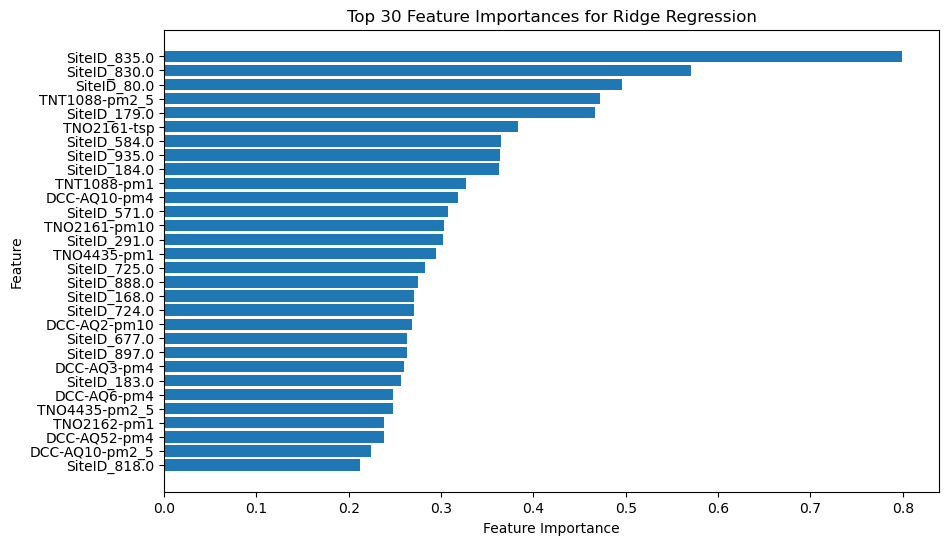

In [41]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = best_ridge.coef_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N features and their importances
top_n = 30  # Adjust this value based on your preference
top_features = Xtrain_KNN_encoded.columns[sorted_indices][:top_n]
top_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_importances, align='center')
plt.yticks(range(top_n), top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances for Ridge Regression'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature at the top
plt.show()

Analysis of the model:  
- The RMSE value of 5.256 indicates that, on average, the predictions made by the Ridge regression model differ from the actual values by about 5.26 units.
- An R-squared value of 0.0799 suggests that the model is not capturing much of the underlying pattern in the data. Most of the variability in the target variable remains unexplained by the model.
- Sensor TNT1088'S capture of pm2_5 is the 4th most important feature in the model 

## Ridge with Log Values

In [42]:
# ytest_log = np.log1p(ytest)

ytrain_log = np.log1p(ytrain)

best_ridge.fit(Xtrain_KNN_encoded, ytrain_log)

# Predict using the test set
y_pred_log_ridge = best_ridge.predict(Xtest_KNN_encoded)

# Exponentiate the predictions to revert back to the original scale
y_pred_ridge = np.expm1(y_pred_log_ridge)

In [43]:

# Evaluate the model
test_rmse_ridge_log = np.sqrt(mean_squared_error(ytest, y_pred_ridge))
print(f"Test RMSE - Ridge: {test_rmse_ridge_log}")

#Calculate R-squared score
r2_ridge_log = r2_score(ytest, y_pred_ridge)
print("R-squared - Ridge:", r2_ridge_log)

Test RMSE - Ridge: 5.081884642175657
R-squared - Ridge: 0.13989415612259337


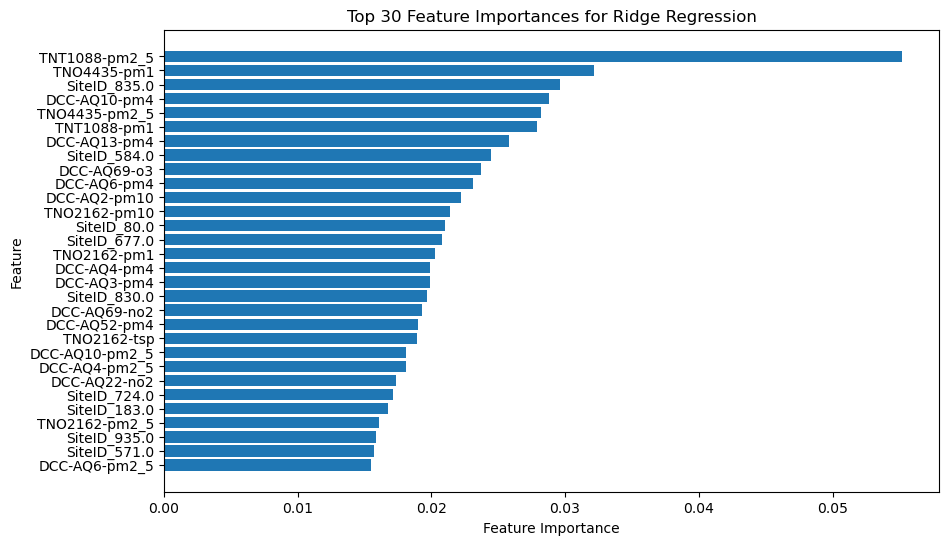

<Figure size 640x480 with 0 Axes>

In [74]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = best_ridge.coef_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N features and their importances
top_n = 30  # Adjust this value based on your preference
top_features = Xtrain_KNN_encoded.columns[sorted_indices][:top_n]
top_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_importances, align='center')
plt.yticks(range(top_n), top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances for Ridge Regression'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature at the top
plt.show()
plt.show()
plt.savefig('Plots/model5a_Ridge.png', format = 'png')  # Adjust path and format as needed

A higher R-squared of 0.13989415612259337 compared to the previous one of .07991032592188596 that indicates that the log transformation has made the linear model a better fit for the data. The RMSE is also slightly lower in the logged model,  5.256103779403499 against 5.081884642175657 

## Training RMSE

In [46]:
ytest_log = np.log1p(ytest)

In [60]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Initialize RandomForest with best-found parameters
# Initialize the Ridge
ridge_model = Ridge(solver='sag', 
              max_iter=1000, 
              tol=0.001, 
              fit_intercept=True, 
              random_state=123)

# Prepare TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
training_mse_ridge = []

# Training and evaluation loop for each fold
for train_index, val_index in tscv.split(Xtrain_KNN_encoded):
    X_train_fold, X_val_fold = Xtrain_KNN_encoded.iloc[train_index], Xtrain_KNN_encoded.iloc[val_index]
    y_train_fold, y_val_fold = ytrain_log[train_index], ytrain_log[val_index]

    ridge_model.fit(X_train_fold, y_train_fold)
    y_train_pred = ridge_model.predict(X_train_fold)

    # Inverse transform predictions
    y_train_pred_orig = np.expm1(y_train_pred)
    y_train_fold_orig = np.expm1(y_train_fold)

    # Calculate MSE on the original scale
    rmse = np.sqrt(mean_squared_error(y_train_fold_orig, y_train_pred_orig))
    training_mse_ridge.append(rmse)

# Fit on entire training set
ridge_model.fit(Xtrain_KNN_encoded, ytrain_log)

# Predict on training and test sets
y_train_pred_full = ridge_model.predict(Xtrain_KNN_encoded)
y_test_pred = ridge_model.predict(Xtest_KNN_encoded)

# Inverse transform predictions
y_train_pred_full_orig = np.expm1(y_train_pred_full)
y_test_pred_orig = np.expm1(y_test_pred)

# Calculate RMSE on the original scale
train_rmse_ridge = np.sqrt(mean_squared_error(np.expm1(ytrain_log), y_train_pred_full_orig))
test_rmse_rridge = np.sqrt(mean_squared_error(np.expm1(ytest_log), y_test_pred_orig))

# Output the results
print("Training MSE for each fold (original scale) - Ridge:", training_mse_ridge)
print("Training RMSE (original scale) - Ridge:", train_rmse_ridge)
print("Test RMSE (original scale) - Ridge:", test_rmse_ridge)

Training MSE for each fold (original scale) - Ridge: [5.966644316226415, 6.625533138282233, 7.2337949512359305, 7.291929033849666, 7.24024257730667]
Training RMSE (original scale) - Ridge: 7.172305810611622
Test RMSE (original scale) - Ridge: 5.256103779403499


# Lasso 

In [48]:
# Initialize the Linear Regression model
lasso = Lasso(alpha=0.1, 
              fit_intercept=True, 
              max_iter=10000, 
              tol=0.0001, 
              random_state=123,
                selection='random')

# You can still use TimeSeriesSplit for cross-validation to evaluate model performance
tscv = TimeSeriesSplit(n_splits=5)

# Evaluate the model using cross-validation
scores = cross_val_score(lasso,
                        Xtrain_KNN_encoded,
                        ytrain, 
                        cv=tscv,
                        scoring='neg_mean_squared_error')

# Print the average of the scores (neg_mean_squared_error)
print("Average MSE:", np.mean(-scores))

# Fit the model on the training data
lasso.fit(Xtrain_KNN_encoded, ytrain)

# Predict on the test data
y_pred_lasso = lasso.predict(Xtest_KNN_encoded)

test_rmse_lasso = np.sqrt(mean_squared_error(ytest, y_pred_lasso))
print(f"Test RMSE - Lasso: {test_rmse_lasso}")

# Calculate R-squared score
r2_lasso = r2_score(ytest, y_pred_lasso)
print("R-squared - Lasso:", r2_lasso)

Average MSE: 53.71126531556431
Test RMSE - Lasso: 5.202394644625362
R-squared - Lasso: 0.09861799956908268


In [49]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'alpha': np.logspace(-4, 4, 20)  # This creates 20 logarithmically spaced values between 10^-4 and 10^4.
}

# Initialize the Lasso
lasso_model = Lasso(fit_intercept=True, 
                    max_iter=10000, 
                    tol=0.0001,
                    random_state=42, 
                    selection='random')


# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Perform GridSearchCV with TimeSeriesSplit for cross-validation
grid_search = GridSearchCV(estimator=lasso, 
                           param_grid=param_grid, 
                           cv=tscv, scoring='neg_mean_squared_error', 
                           verbose=2, 
                           n_jobs=-1) # grid_search.fit(X_train_subset, y_train_subset)

grid_search.fit(Xtrain_KNN_encoded, ytrain)

# Best hyperparameters
best_params = grid_search.best_params_['alpha']
print("Best parameter - Lasso:", grid_search.best_params_)
print("Best RMSE - Lasso:", np.sqrt(-grid_search.best_score_))

# best_alpha = grid_search.best_params_['alpha']
# print("Best parameters: alpha =", best_alpha)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter - Lasso: {'alpha': 0.08858667904100823}
Best RMSE - Lasso: 7.327600824118896


In [50]:
best_params = {'alpha': 0.08858667904100823}
# Initialize Ridge with best alpha
best_lasso = Lasso(random_state=123, **best_params) # **best_params

# Train the model on the full training data
best_lasso.fit(Xtrain_KNN_encoded, ytrain)

# Make predictions on the test set
y_pred_lasso = best_lasso.predict(Xtest_KNN_encoded)

# Calculate RMSE on the test set
test_rmse_lasso = np.sqrt(mean_squared_error(ytest, y_pred_lasso))
print("Test RMSE - Lasso:", test_rmse_lasso)

# Calculate R-squared score
r2_lasso = r2_score(ytest, y_pred_lasso)
print("R-squared - Lasso:", r2_lasso)

Test RMSE - Lasso: 5.202320115571579
R-squared - Lasso: 0.09864382562457297


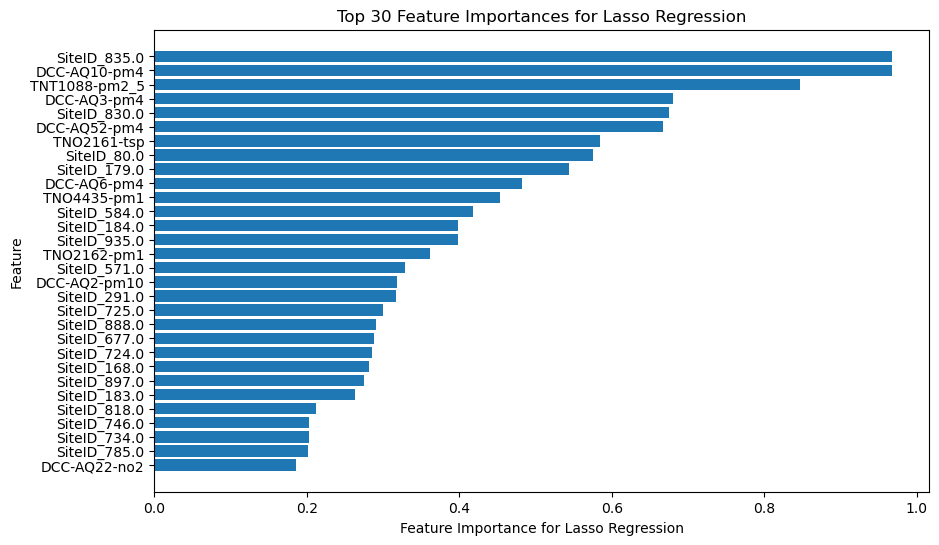

In [51]:
# Get feature importances from the trained model
feature_importances = best_lasso.coef_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N features and their importances
top_n = 30  # Adjust this value based on your preference
top_features = Xtrain_KNN_encoded.columns[sorted_indices][:top_n]
top_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_importances, align='center')
plt.yticks(range(top_n), top_features)
plt.xlabel('Feature Importance for Lasso Regression')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances for Lasso Regression'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature at the top
plt.show()

Analysis of the model:  
- The RMSE value of 5.202 indicates that, on average, the predictions made by the Ridge regression model differ from the actual values by about 5.202 units.
- An R-squared value of 0.098 suggests that the model is not capturing much of the underlying pattern in the data. Most of the variability in the target variable remains unexplained by the model. Once again, linear regression r-squared of 0.19 shows better ability to capture the variability in the data.
- Sensor TNT1088'S capture of pm2_5 is the 3rd most important feature in the model, and DCC-AQ10-pm4 is the second 

## Lasso with Log Values

In [52]:
# ytest_log = np.log1p(ytest)

ytrain_log = np.log1p(ytrain)

best_lasso.fit(Xtrain_KNN_encoded, ytrain_log)

# Predict using the test set
y_pred_log_lasso = best_lasso.predict(Xtest_KNN_encoded)

# Exponentiate the predictions to revert back to the original scale
y_pred_lasso = np.expm1(y_pred_log_lasso)

In [53]:
# Evaluate the model
test_rmse_lasso_log = np.sqrt(mean_squared_error(ytest, y_pred_lasso))
print(f"Test RMSE - Lasso: {test_rmse_lasso_log}")

#Calculate R-squared score
r2_lasso_log = r2_score(ytest, y_pred_lasso)
print("R-squared - Lasso:", r2_lasso_log)

Test RMSE - Lasso: 5.147465382105808
R-squared - Lasso: 0.11755191958537259


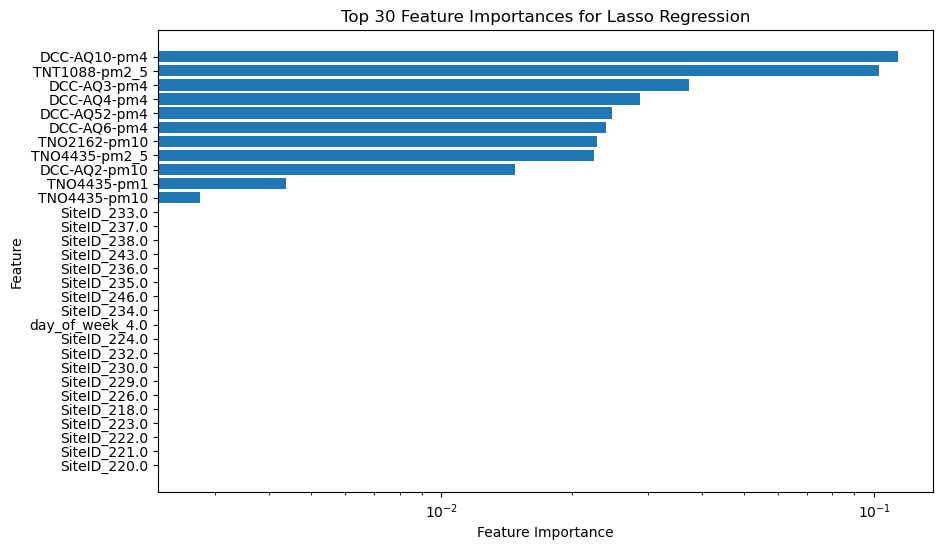

In [76]:
# Get feature importances from the trained model
feature_importances = best_lasso.coef_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Get the top N features and their importances
top_n = 30  # Adjust this value based on your preference
top_features = Xtrain_KNN_encoded.columns[sorted_indices][:top_n]
top_importances = feature_importances[sorted_indices][:top_n]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_importances, align='center')
plt.yticks(range(top_n), top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances for Lasso Regression'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature at the top


# Set x-axis to log scale to better visualize small features
plt.xscale('log')

# Handle any negative or zero values (assuming you have only positive values; if not, adjust here)
plt.xlim(left=np.min(top_importances[top_importances > 0]) * 0.8)  # set lower limit slightly lower than the smallest positive value

plt.show()

 A higher R-squared of 0.11755191958537259 compared to the previous one of 0.09864382562457297 indicates that the log transformation has made the lasso model a better fit for the data. The RMSE is also slightly lower in the logged model, 5.147465382105808 against 5.202320115571579

In [58]:
# Initialize RandomForest with best-found parameters
lasso_model = Lasso( 
              fit_intercept=True, 
              max_iter=10000, 
              tol=0.0001, 
              random_state=123,
                selection='random')

# Prepare TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
training_mse_lasso = []

# Training and evaluation loop for each fold
for train_index, val_index in tscv.split(Xtrain_KNN_encoded):
    X_train_fold, X_val_fold = Xtrain_KNN_encoded.iloc[train_index], Xtrain_KNN_encoded.iloc[val_index]
    y_train_fold, y_val_fold = ytrain_log[train_index], ytrain_log[val_index]

    lasso_model.fit(X_train_fold, y_train_fold)
    y_train_pred = lasso_model.predict(X_train_fold)

    # Inverse transform predictions
    y_train_pred_orig = np.expm1(y_train_pred)
    y_train_fold_orig = np.expm1(y_train_fold)

    # Calculate MSE on the original scale
    rmse = np.sqrt(mean_squared_error(y_train_fold_orig, y_train_pred_orig))
    training_mse_lasso.append(rmse)

# Fit on entire training set
lasso_model.fit(Xtrain_KNN_encoded, ytrain_log)

# Predict on training and test sets
y_train_pred_full = lasso_model.predict(Xtrain_KNN_encoded)
y_test_pred = lasso_model.predict(Xtest_KNN_encoded)

# Inverse transform predictions
y_train_pred_full_orig = np.expm1(y_train_pred_full)
y_test_pred_orig = np.expm1(y_test_pred)

# Calculate RMSE on the original scale
train_rmse_lasso = np.sqrt(mean_squared_error(np.expm1(ytrain_log), y_train_pred_full_orig))
test_rmse_lasso = np.sqrt(mean_squared_error(np.expm1(ytest_log), y_test_pred_orig))

# Output the results
print("Training MSE for each fold (original scale):", training_mse_lasso)
print("Training RMSE (original scale):", train_rmse_lasso)
print("Test RMSE (original scale):", test_rmse_lasso)

Training MSE for each fold (original scale): [7.687186809813002, 8.075330544464238, 8.733311577649388, 8.727960953908294, 8.97111440417512]
Training RMSE (original scale): 9.007466571910628
Test RMSE (original scale): 5.742207844497579


# Comparisons 


Overall, Ridge seems to be berforming best. 

----------------------------------------------------
- Test RMSE - Linear: 5.9779093382713375
- R-squared - Linear: 0.19014792007349413

Logged: 

- Test RMSE - Linear: 7.635292639101635
- R-squared - Linear: 0.9415727478655314
----------------------------------------------------

- Test RMSE - Ridge: 5.256103779403499
- R-squared - Ridge: 0.07991032592188596

Logged: 

- Test RMSE - Ridge: 5.081884642175657
- R-squared - Ridge: 0.13989415612259337

----------------------------------------------------

- Test RMSE - Lasso: 5.202320115571579
- R-squared - Lasso: 0.09864382562457297

Logged: 

- Test RMSE - Lasso: 5.147465382105808
- R-squared - Lasso: 0.11755191958537259

----------------------------------------------------